In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from wordcloud import WordCloud
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv("dataset.csv") 
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [5]:
df['Cleaned_Resume'] = df['Resume'].str.replace(r'[^\w\s]', '', regex=True).str.lower()
df

,Category,Resume,Cleaned_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas nu...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details \r\nmay 2013 to may 2017 be ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control system...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills â r â python â sap hana â tableau â sap...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details \r\n mca ymcaust faridaba...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,computer skills â proficient in ms office word...
958,Testing,â Willingness to accept the challenges. â ...,â willingness to accept the challenges â posit...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personal skills â quick learner â eagerness to...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer skills software knowledge mspower po...


C:\Users\Aryan Kakran\AppData\Local\Temp\ipykernel_12168\3804463665.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Category", data=df, order=df['Category'].value_counts().index, palette="viridis")


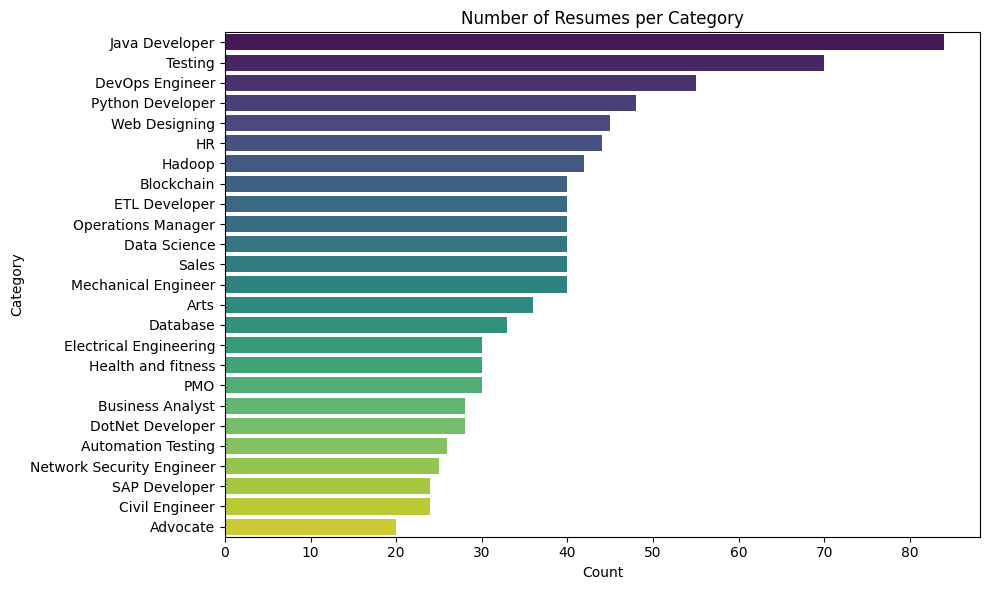

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(y="Category", data=df, order=df['Category'].value_counts().index, palette="viridis")
plt.title("Number of Resumes per Category")
plt.xlabel("Count")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

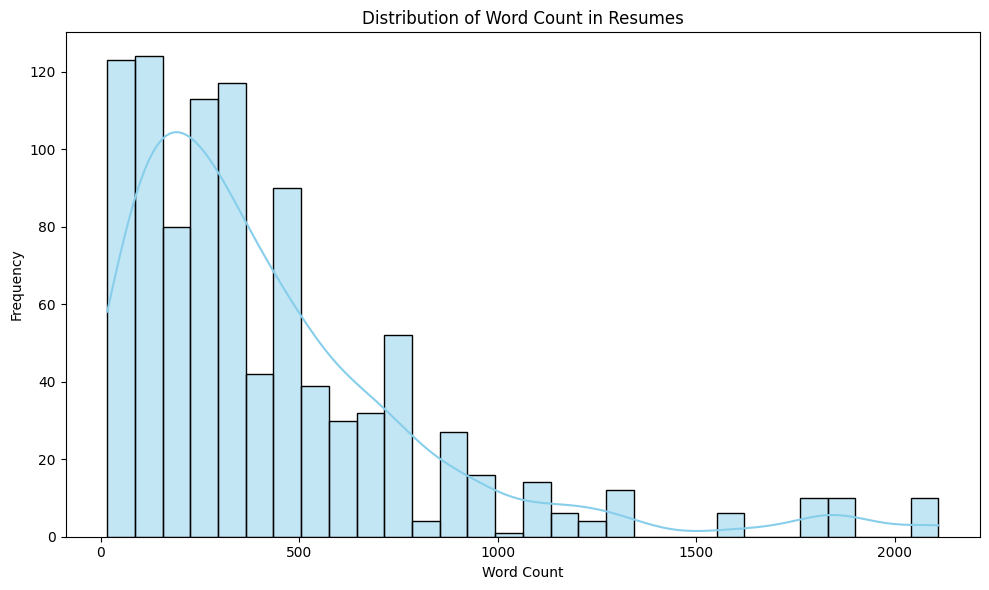

In [18]:
df['word_count'] = df['Cleaned_Resume'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], kde=True, color='skyblue', bins=30)
plt.title("Distribution of Word Count in Resumes")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [6]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)  # Use max_features to limit terms
X = vectorizer.fit_transform(df['Cleaned_Resume'])

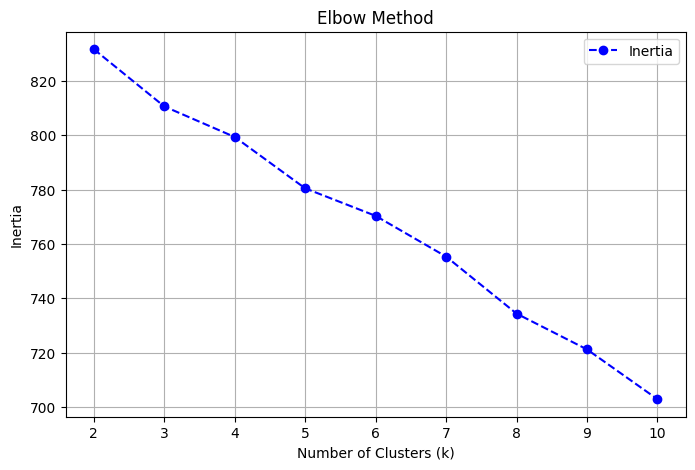

In [8]:
inertia = []
silhouette_scores = []
range_clusters = range(2, 11)  # Testing cluster range from 2 to 10

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o', linestyle='--', color='b', label='Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.legend()
plt.grid()
plt.show()

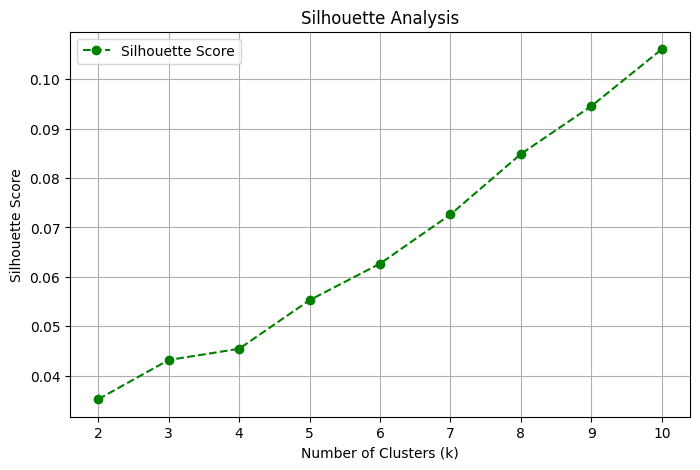

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, silhouette_scores, marker='o', linestyle='--', color='g', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.legend()
plt.grid()
plt.show()

In [10]:
optimal_k = 4  # Replace with the number based on the Elbow or Silhouette analysis
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X)
df['Cluster'] = clusters

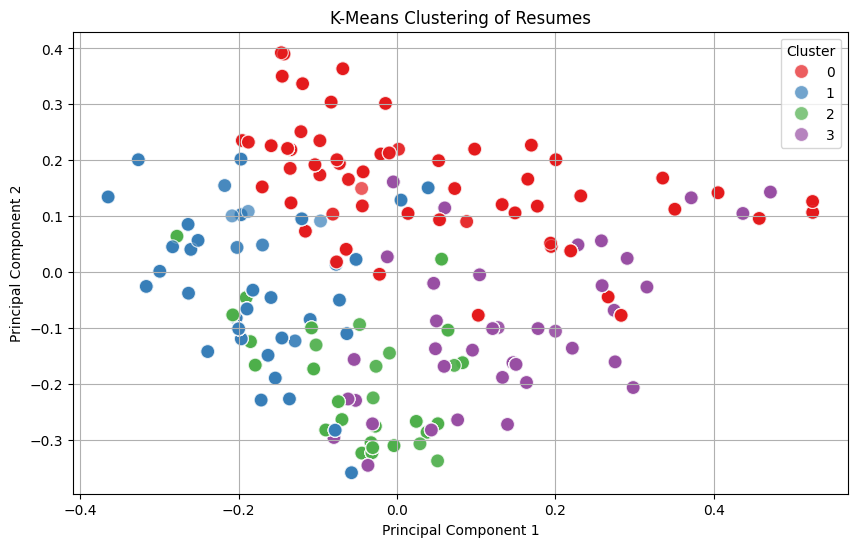

In [11]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(X.toarray())
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=reduced_features[:, 0],
    y=reduced_features[:, 1],
    hue=df['Cluster'],
    palette='Set1',
    s=100,
    alpha=0.7
)
plt.title('K-Means Clustering of Resumes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

Cluster Summary:
 Cluster  Category                 
0        Java Developer               84
         Hadoop                       42
         DevOps Engineer              35
         Database                     33
         ETL Developer                32
         SAP Developer                20
         Web Designing                18
         DotNet Developer             16
         Blockchain                   16
         Testing                      10
         Python Developer              8
         Data Science                  8
         Automation Testing            4
         Business Analyst              2
1        Testing                      50
         Sales                        32
         PMO                          30
         Operations Manager           30
         Electrical Engineering       24
         Automation Testing           22
         Business Analyst             20
         Web Designing                18
         Network Security Engineer    15
    

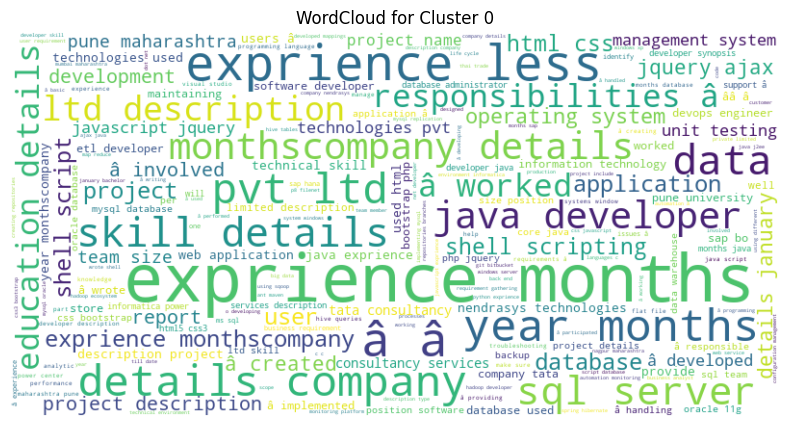

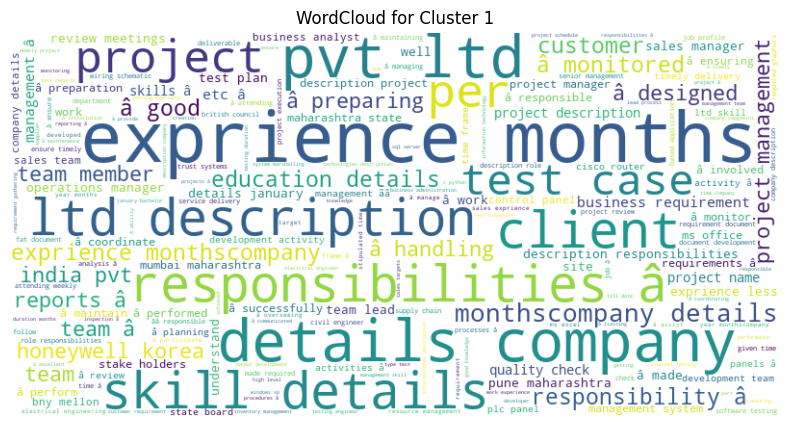

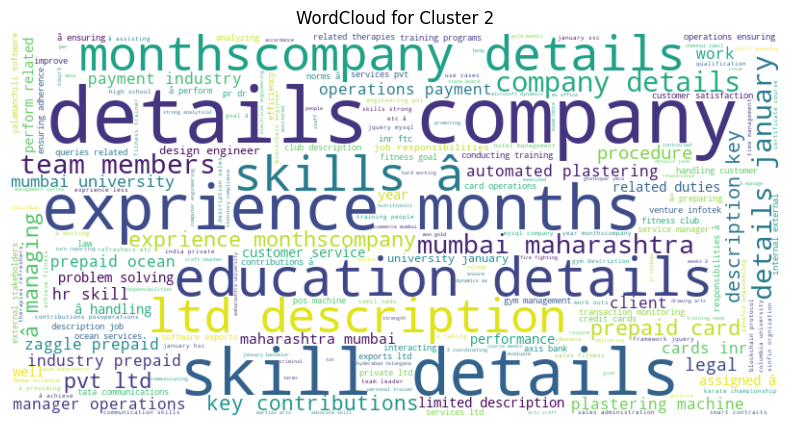

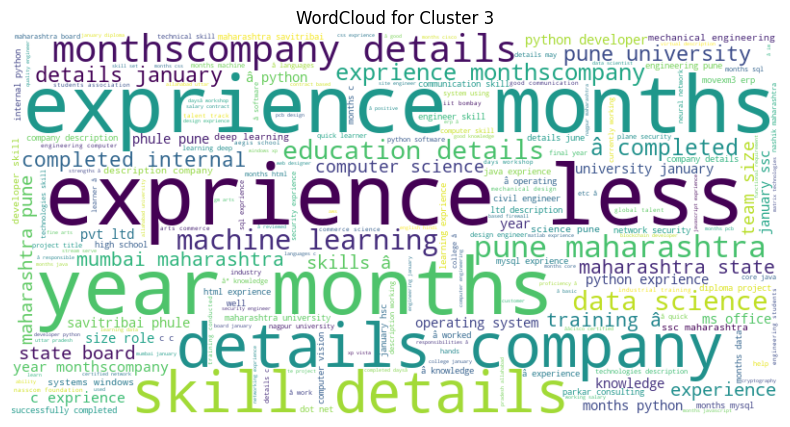

In [12]:
cluster_summary = df.groupby('Cluster')['Category'].value_counts()
print("Cluster Summary:\n", cluster_summary)

# Step 7: WordCloud for Each Cluster
for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]['Cleaned_Resume']
    text = " ".join(cluster_data)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'WordCloud for Cluster {cluster}')
    plt.axis('off')
    plt.show()

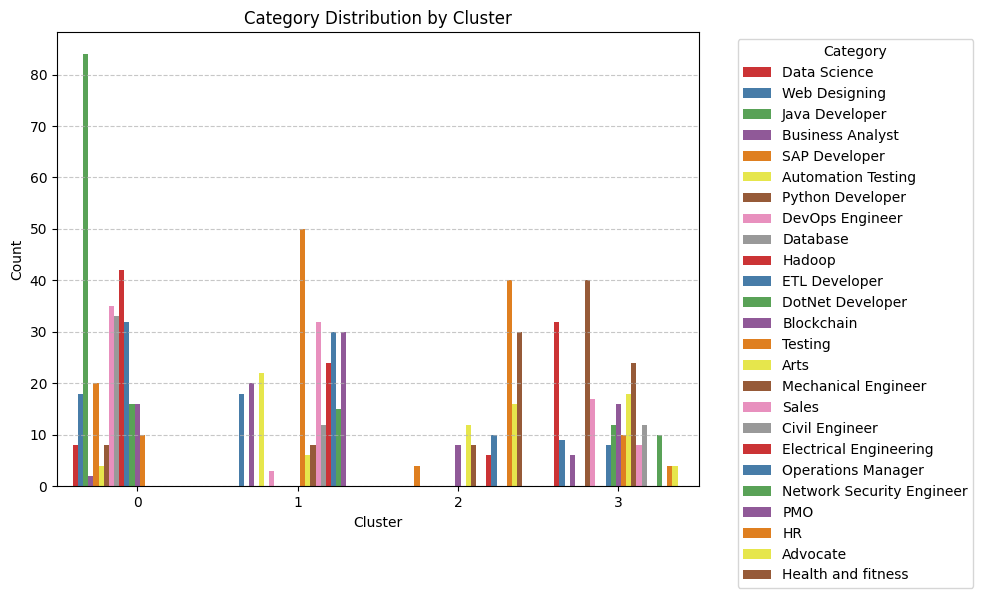

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Cluster', hue='Category', palette='Set1')
plt.title('Category Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Aryan Kakran\AppData\Local\Temp\ipykernel_12168\2093101404.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values, palette='Set2')


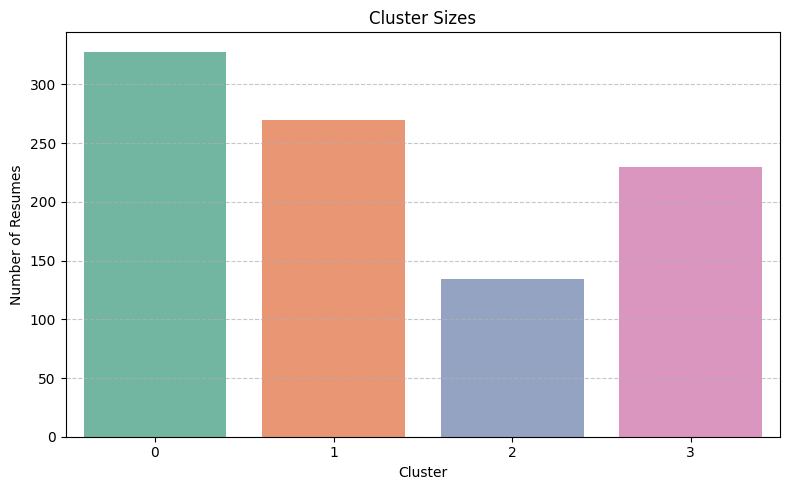

In [14]:
plt.figure(figsize=(8, 5))
cluster_sizes = df['Cluster'].value_counts().sort_index()
sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values, palette='Set2')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Resumes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

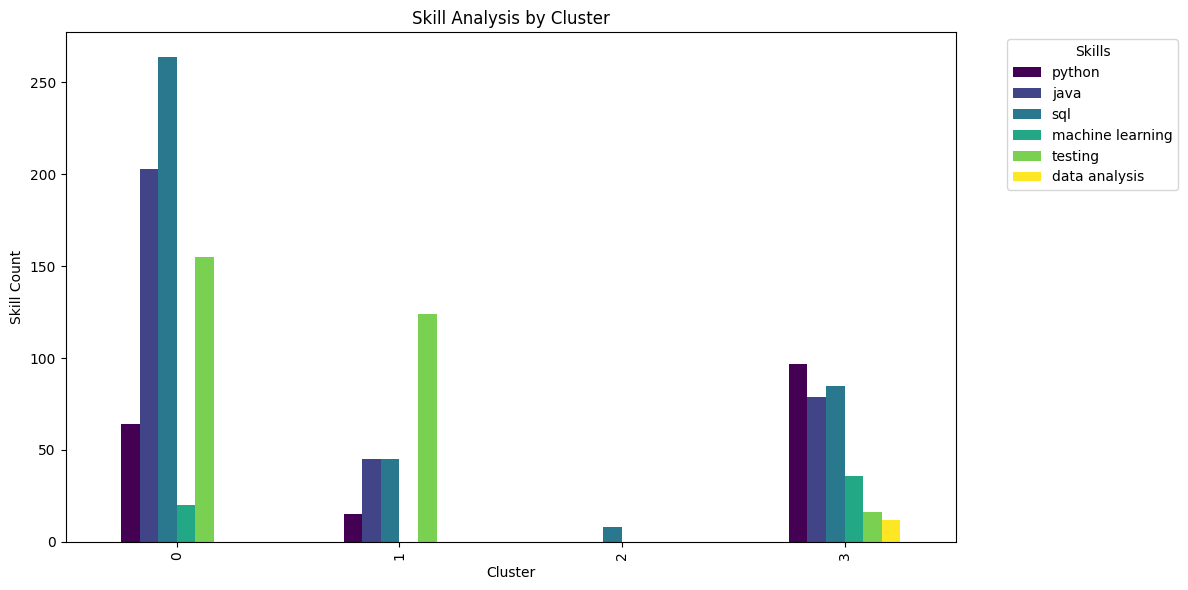

In [15]:
skills_list = ['python', 'java', 'sql', 'machine learning', 'testing', 'data analysis']
for skill in skills_list:
    df[skill] = df['Cleaned_Resume'].apply(lambda x: 1 if skill in x else 0)

skills_summary = df.groupby('Cluster')[skills_list].sum()
skills_summary.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Skill Analysis by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Skill Count')
plt.legend(title='Skills', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()